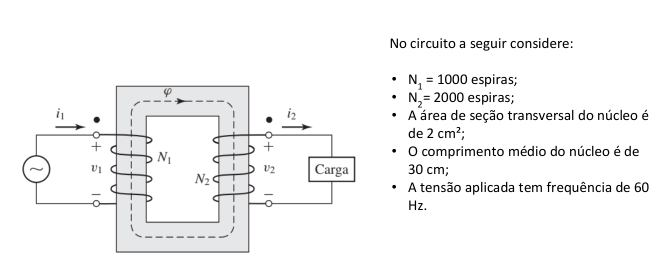

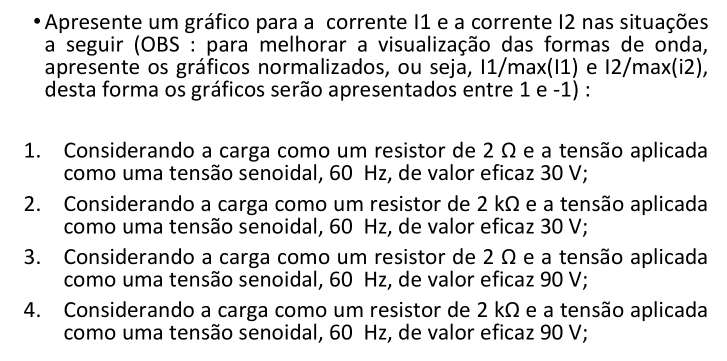

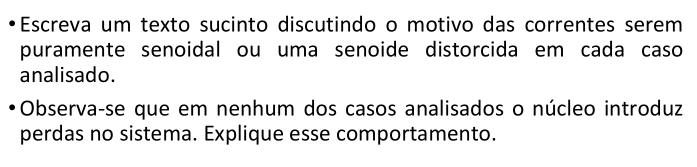

# Solução

Algumas considerações devem ser feitas:

* O sistema descrito é na verdade um transformador;
* Considera-se que o fluxo no núcleo segue exatamente a curva BxH do material do núcleo;
* Sabe-se com segurança o comportamento do sistema dentro do intervalo de dados disponível;

Considerando os valores de $\vec B$ do conjunto de dados e as dimensões do núcleo, é seguro afirmar que o fluxo magnético líquido no núcleo para cada valor de densidade é:

$\Phi = \vec B A_c$

$A_c$ é a área de seção transversal do núcleo.

Das simplificações das leis de Faraday e Ampère sabe-se que:

$F_m = ni = H_cl_c$

Portanto, para uma bobina $x$ com $n_x$ enrolamentos, é possível determinar a corrente em cada bobina para cada valor de $H$ disponível nos dados.

$i = \frac{H_cl_c}{n}$

Considerando que a variação do fluxo concatenado na bobina faz aparecer uma tensão nos terminais e que uma tensão alternada nos terminais faz surgir um fluxo concatenado, é possível relacionar tensão com os dados de densidade de fluxo para o material que forma o núcleo da seguinte forma:

Supondo que a variação de fluxo no núcleo seja:

$\phi(t) = \phi_{ins} \sin(\omega t) $

$\lambda(t) = n_x \phi_{ins} \sin(\omega t) $

$E_{ind} = \frac{d\lambda(t)}{dt} = n_x \phi_{ins} \omega \cos(\omega t)$ 

Dessa forma, para cada valor de tensão nos terminais é possível associar um valor de $\phi = \phi_{ins} = \frac{n_x \phi_{ins} \omega}{n_x \omega}$

Ou seja,

$\phi = \frac{E}{n_x \omega}$

Então, considerando que para o sistema é possível determinar a corrente para cada valor de $\phi$, é possível então determinar a corrente de magnetização da bobina pra uma dada tensão aplicada nos terminais.

Primeiro considere que a tensão aplicada é:

$v(t) = V_{max}\cos(\omega t)$

Agora para cada valor de $v(t)$ calcula-se o $\phi$:

$\phi = \frac{E}{n_x \omega}$

$i = \frac{H_cl_c}{n}$

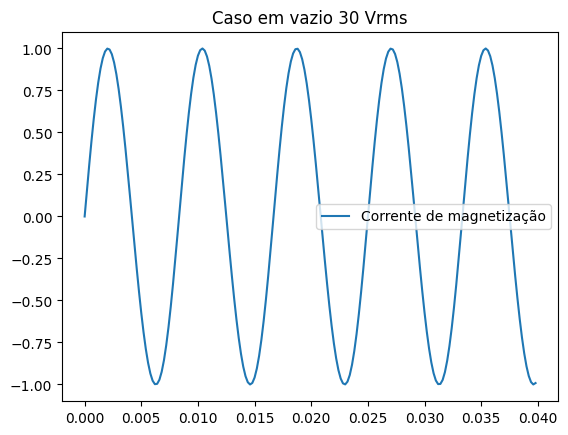

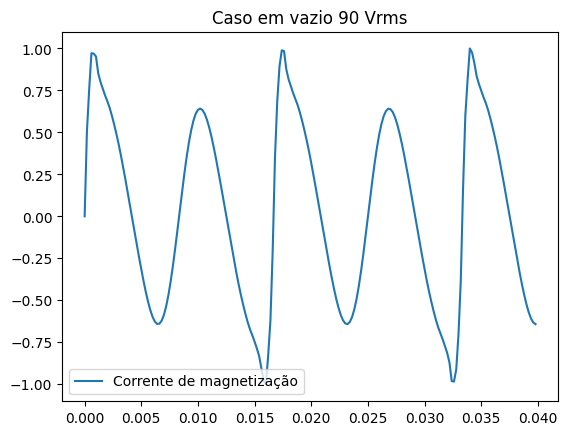

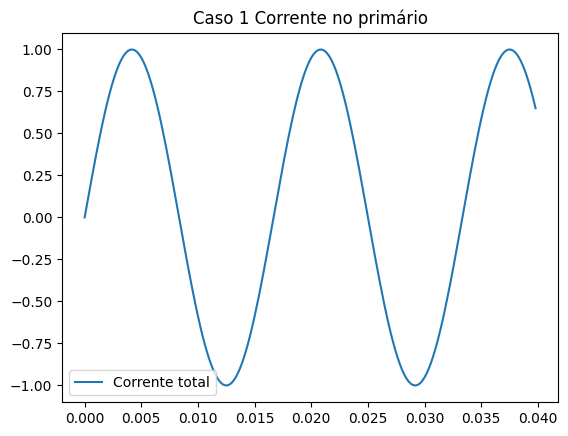

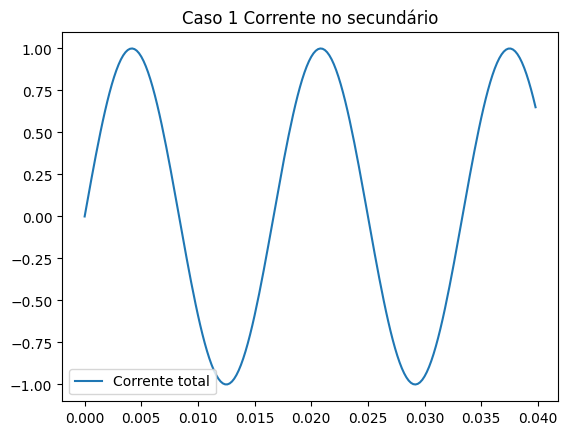

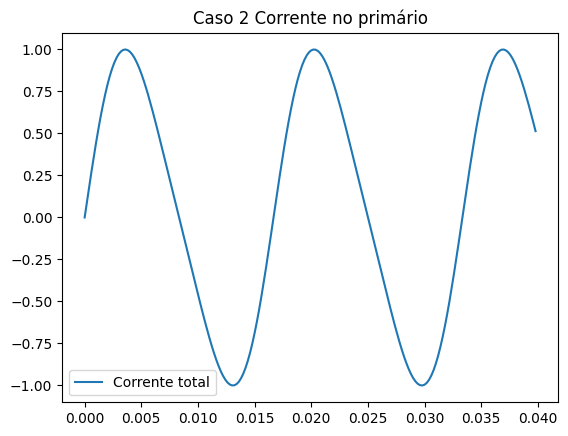

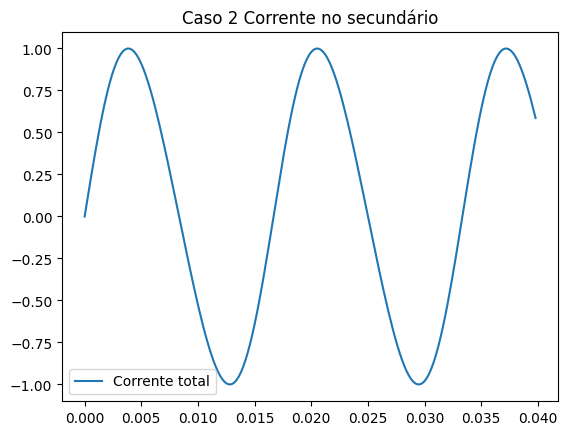

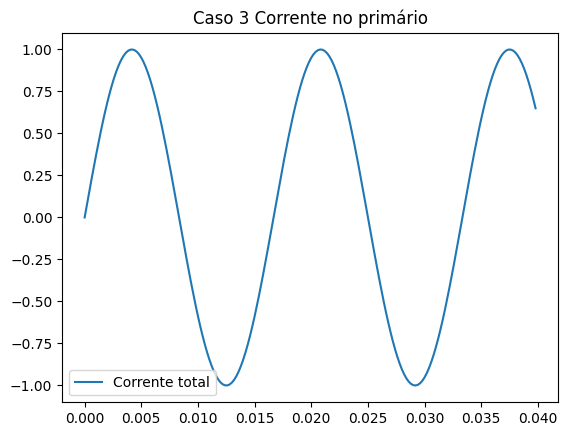

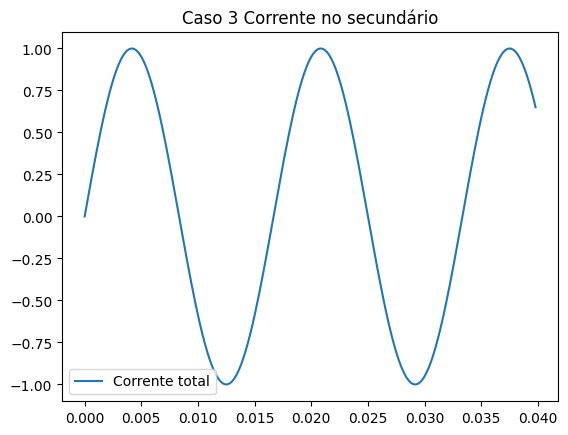

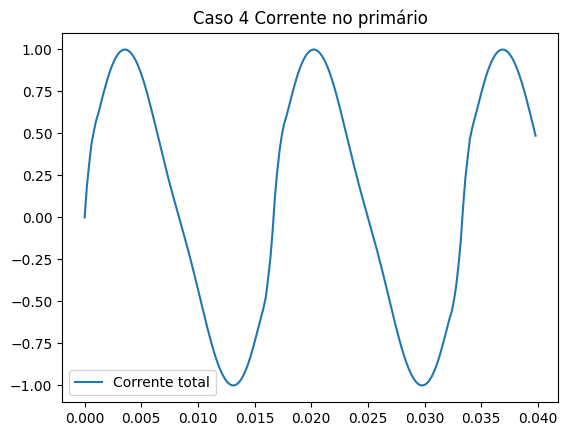

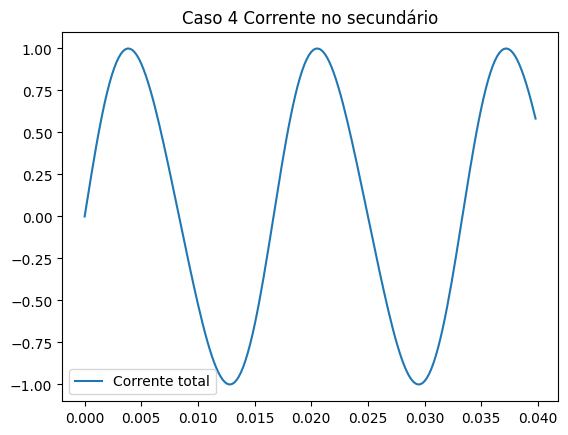

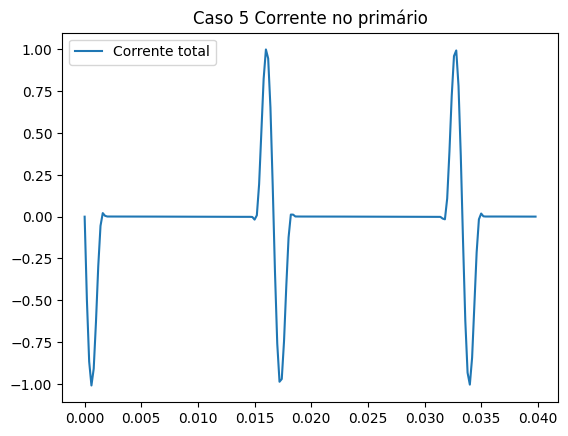

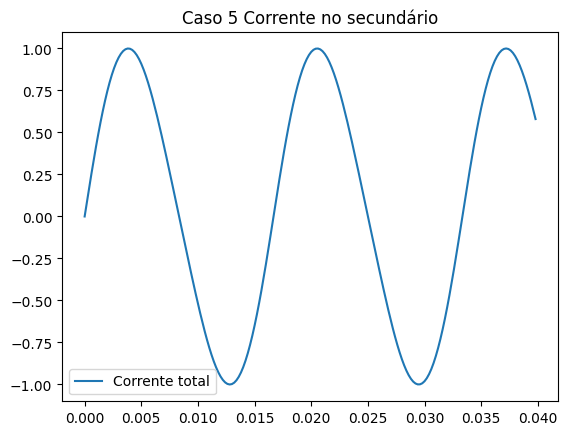

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.interpolate import CubicSpline

H=np.array([0, 68, 135, 203, 271, 338,
            406, 474, 542, 609, 1100, 1500,2500,4000,
            5000,9000, 12000,20000,25000 ])

B=np.array([0, 0.733, 1.205, 1.424, 1.517, 1.56,
            1.588, 1.617, 1.631, 1.646, 1.689,
            1.703, 1.724, 1.731, 1.738, 1.762, 1.770, 1.8, 1.816 ])

# Dados da questão
n1 = 1000; n2 = 2000; a_S = 2E-4; l_c = 30E-2; f=60;
N = n2/n1
w = 2*np.pi*f

# Caso 1: 
v1 = 30; r1 = 2;

# Caso 2:
v2 = 30; r1 = 2E3;

# Caso 3:
v3 = 90; r3 = 2;

# Caso 4:
v4 = 90; r4 = 2E3;

tempo = np.linspace(0,15/w,200)

def tensao(v_rms, frequencia, intervalo_tempo):
    return v_rms*np.sqrt(2)*np.cos(frequencia*intervalo_tempo)

fluxo_magnetico_liquido = B*a_S
H_l = H*l_c

# Aqui é estabelecida uma relação entre os valores absolutos de fluxo e tensão
Tensao_Primario = n1*fluxo_magnetico_liquido*w
Tensao_Secundario = n2*fluxo_magnetico_liquido*w

# Corrente e campo magnético
corrente_primario = H_l/n1
corrente_secundario = H_l/n2

def corrente(amplitude, frequencia, intervalo_tempo):
    return amplitude*np.sin(frequencia*intervalo_tempo)


i_p = CubicSpline(Tensao_Primario, corrente_primario, bc_type='natural')
i_s = CubicSpline(Tensao_Secundario, corrente_secundario, bc_type='natural')

# Caso em vazio e tensão de 30V:
v_vazio = 30
V_primario_vazio = tensao(v_vazio, w, tempo)
amplitude_corrente_mag_vazio = i_p(V_primario_vazio)
I_primario_vazio = corrente(amplitude_corrente_mag_vazio, w, tempo)
I_primario_vazio = I_primario_vazio/np.max(I_primario_vazio) #Normalização

plt.figure()
plt.plot(tempo, I_primario_vazio, label='Corrente de magnetização')
plt.title('Caso em vazio 30 Vrms')
plt.legend()
plt.show()

# Caso em vazio e tensão de 90V:
v_vazio = 90
V_primario_vazio = tensao(v_vazio, w, tempo)
amplitude_corrente_mag_vazio = i_p(V_primario_vazio)
I_primario_vazio = corrente(amplitude_corrente_mag_vazio, w, tempo)
I_primario_vazio = I_primario_vazio/np.max(I_primario_vazio) #Normalização

plt.figure()
plt.plot(tempo, I_primario_vazio, label='Corrente de magnetização')
plt.title('Caso em vazio 90 Vrms')
plt.legend()
plt.show()

# Caso 1: 
v1 = 30; r1 = 2;
# Primeiro refletindo a impedância para o primário:
r1_refletido = r1/(N**2)
corrente_na_carga_1 = v1/r1_refletido # Arms
corrente_na_carga_1_senoide = corrente(corrente_na_carga_1, w, tempo)
v_caso_1 = tensao(v1, w, tempo)
amplitude_corrente_mag_caso_1 = i_p(v_caso_1)
corrente_mag_caso_1_senoide = corrente(amplitude_corrente_mag_caso_1, w, tempo)
corrente_total_caso_1 = corrente_na_carga_1_senoide + corrente_mag_caso_1_senoide
corrente_total_caso_1 = corrente_total_caso_1/np.max(corrente_total_caso_1) #Normalização

plt.figure()
plt.plot(tempo, corrente_total_caso_1, label='Corrente total')
plt.title('Caso 1 Corrente no primário')
plt.legend()
plt.show()

# Refletindo a corrente para o secundário:
corrente_refletida = corrente_na_carga_1/N
corrente_refletida_senoide = corrente(corrente_refletida, w, tempo)
corrente_mag_caso_1_secundario = i_s(v_caso_1)
corrente_mag_caso_1_secundario_senoide = corrente(corrente_mag_caso_1_secundario, w, tempo)
corrente_total_caso_1_secundario = corrente_refletida_senoide + corrente_mag_caso_1_secundario_senoide
corrente_total_caso_1_secundario = corrente_total_caso_1_secundario/np.max(corrente_total_caso_1_secundario) #Normalização

plt.figure()
plt.plot(tempo, corrente_total_caso_1_secundario, label='Corrente total')
plt.title('Caso 1 Corrente no secundário')
plt.legend()
plt.show()

# Caso 2:
v2 = 30; r2 = 2E3;
# Primeiro refletindo a impedância para o primário:
r2_refletido = r2/(N**2)
corrente_na_carga_2 = v2/r2_refletido # Arms
corrente_na_carga_2_senoide = corrente(corrente_na_carga_2, w, tempo)
v_caso_2 = tensao(v2, w, tempo)
amplitude_corrente_mag_caso_2 = i_p(v_caso_2)
corrente_mag_caso_2_senoide = corrente(amplitude_corrente_mag_caso_2, w, tempo)
corrente_total_caso_2 = corrente_na_carga_2_senoide + corrente_mag_caso_2_senoide
corrente_total_caso_2 = corrente_total_caso_2/np.max(corrente_total_caso_2) #Normalização

plt.figure()
plt.plot(tempo, corrente_total_caso_2, label='Corrente total')
plt.title('Caso 2 Corrente no primário')
plt.legend()
plt.show()

# Refletindo a corrente para o secundário:
corrente_refletida = corrente_na_carga_2/N
corrente_refletida_senoide = corrente(corrente_refletida, w, tempo)
corrente_mag_caso_2_secundario = i_s(v_caso_2)
corrente_mag_caso_2_secundario_senoide = corrente(corrente_mag_caso_2_secundario, w, tempo)
corrente_total_caso_2_secundario = corrente_refletida_senoide + corrente_mag_caso_2_secundario_senoide
corrente_total_caso_2_secundario = corrente_total_caso_2_secundario/np.max(corrente_total_caso_2_secundario) #Normalização

plt.figure()
plt.plot(tempo, corrente_total_caso_2_secundario, label='Corrente total')
plt.title('Caso 2 Corrente no secundário')
plt.legend()
plt.show()


# Caso 3:
v3 = 90; r3 = 2;

# Primeiro refletindo a impedância para o primário:
r3_refletido = r3/(N**2)
corrente_na_carga_3 = v3/r3_refletido # Arms
corrente_na_carga_3_senoide = corrente(corrente_na_carga_3, w, tempo)
v_caso_3 = tensao(v3, w, tempo)
amplitude_corrente_mag_caso_3 = i_p(v_caso_3)
corrente_mag_caso_3_senoide = corrente(amplitude_corrente_mag_caso_3, w, tempo)
corrente_total_caso_3 = corrente_na_carga_3_senoide + corrente_mag_caso_3_senoide
corrente_total_caso_3 = corrente_total_caso_3/np.max(corrente_total_caso_3) #Normalização

plt.figure()
plt.plot(tempo, corrente_total_caso_3, label='Corrente total')
plt.title('Caso 3 Corrente no primário')
plt.legend()
plt.show()

# Refletindo a corrente para o secundário:
corrente_refletida = corrente_na_carga_3/N
corrente_refletida_senoide = corrente(corrente_refletida, w, tempo)
corrente_mag_caso_3_secundario = i_s(v_caso_3)
corrente_mag_caso_3_secundario_senoide = corrente(corrente_mag_caso_3_secundario, w, tempo)
corrente_total_caso_3_secundario = corrente_refletida_senoide + corrente_mag_caso_3_secundario_senoide
corrente_total_caso_3_secundario = corrente_total_caso_3_secundario/np.max(corrente_total_caso_3_secundario) #Normalização

plt.figure()
plt.plot(tempo, corrente_total_caso_3_secundario, label='Corrente total')
plt.title('Caso 3 Corrente no secundário')
plt.legend()
plt.show()


# Caso 4:
v4 = 90; r4 = 2E3;
# Primeiro refletindo a impedância para o primário:
r4_refletido = r4/(N**2)
corrente_na_carga_4 = v4/r4_refletido # Arms
corrente_na_carga_4_senoide = corrente(corrente_na_carga_4, w, tempo)
v_caso_4 = tensao(v4, w, tempo)
amplitude_corrente_mag_caso_4 = i_p(v_caso_4)
corrente_mag_caso_4_senoide = corrente(amplitude_corrente_mag_caso_4, w, tempo)
corrente_total_caso_4 = corrente_na_carga_4_senoide + corrente_mag_caso_4_senoide
corrente_total_caso_4 = corrente_total_caso_4/np.max(corrente_total_caso_4) #Normalização

plt.figure()
plt.plot(tempo, corrente_total_caso_4, label='Corrente total')
plt.title('Caso 4 Corrente no primário')
plt.legend()
plt.show()

# Refletindo a corrente para o secundário:
corrente_refletida = corrente_na_carga_4/N
corrente_refletida_senoide = corrente(corrente_refletida, w, tempo)
corrente_mag_caso_4_secundario = i_s(v_caso_4)
corrente_mag_caso_4_secundario_senoide = corrente(corrente_mag_caso_4_secundario, w, tempo)
corrente_total_caso_4_secundario = corrente_refletida_senoide + corrente_mag_caso_4_secundario_senoide
corrente_total_caso_4_secundario = corrente_total_caso_4_secundario/np.max(corrente_total_caso_4_secundario) #Normalização

plt.figure()
plt.plot(tempo, corrente_total_caso_4_secundario, label='Corrente total')
plt.title('Caso 4 Corrente no secundário')
plt.legend()
plt.show()

# Caso 5:
v5 = 120; r5 = 2E3;
# Primeiro refletindo a impedância para o primário:
r5_refletido = r5/(N**2)
corrente_na_carga_5 = v5/r5_refletido # Arms
corrente_na_carga_5_senoide = corrente(corrente_na_carga_5, w, tempo)
v_caso_5 = tensao(v5, w, tempo)
amplitude_corrente_mag_caso_5 = i_p(v_caso_5)
corrente_mag_caso_5_senoide = corrente(amplitude_corrente_mag_caso_5, w, tempo)
corrente_total_caso_5 = corrente_na_carga_5_senoide + corrente_mag_caso_5_senoide
corrente_total_caso_5 = corrente_total_caso_5/np.max(corrente_total_caso_5) #Normalização

plt.figure()
plt.plot(tempo, corrente_total_caso_5, label='Corrente total')
plt.title('Caso 5 Corrente no primário')
plt.legend()
plt.show()

# Refletindo a corrente para o secundário:
corrente_refletida = corrente_na_carga_5/N
corrente_refletida_senoide = corrente(corrente_refletida, w, tempo)
corrente_mag_caso_5_secundario = i_s(v_caso_5)
corrente_mag_caso_5_secundario_senoide = corrente(corrente_mag_caso_5_secundario, w, tempo)
corrente_total_caso_5_secundario = corrente_refletida_senoide + corrente_mag_caso_5_secundario_senoide
corrente_total_caso_5_secundario = corrente_total_caso_5_secundario/np.max(corrente_total_caso_5_secundario) #Normalização

plt.figure()
plt.plot(tempo, corrente_total_caso_5_secundario, label='Corrente total')
plt.title('Caso 5 Corrente no secundário')
plt.legend()
plt.show()
